In [17]:
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[0])
circuit.cx(qreg_q[1], qreg_q[0])
circuit.h(qreg_q[1])
circuit.measure(qreg_q[1], creg_c[0])

print(circuit)

     ┌───┐┌───┐┌───┐        
q_0: ┤ X ├┤ H ├┤ X ├────────
     ├───┤└───┘└─┬─┘┌───┐┌─┐
q_1: ┤ H ├───────■──┤ H ├┤M├
     └───┘          └───┘└╥┘
c: 1/═════════════════════╩═
                          0 


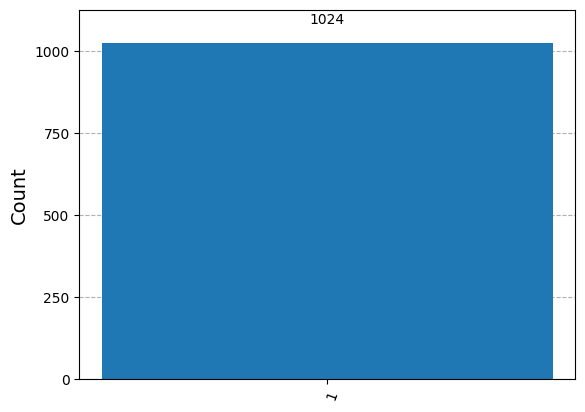

In [19]:
simulator = AerSimulator()
circ = transpile(circuit, simulator)
# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts)